# Loading Data for Starter Code LSTM

 Created By Ronaldson Bellandde
 
 Date of Implementation is 10-22-2020
 
 Copyright MIT

In [1]:
from __future__ import print_function
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import pandas as pd
import math
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
sitting = pd.read_csv("sitting.csv")
standing = pd.read_csv("standing.csv")
walking = pd.read_csv("walking.csv")

In [3]:
print(sitting.shape)
print(standing.shape)
print(walking.shape)

(3000, 1)
(3000, 1)
(3000, 1)


In [4]:
batch_size = 1
number_classes = 10
epochs = 100

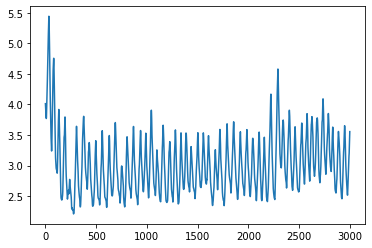

In [5]:
# PLot
plt.plot(sitting)

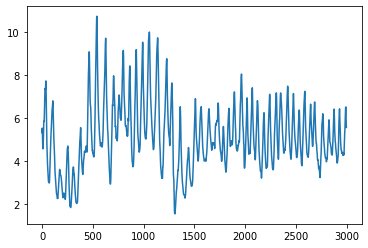

In [6]:
# PLot
plt.plot(standing)

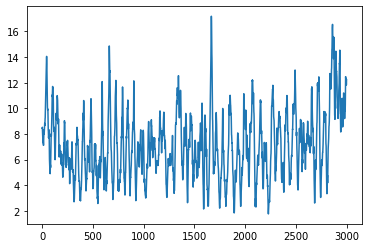

In [7]:
# PLot
plt.plot(walking)

In [8]:
# Fix random seed for reproducibility
np.random.seed(7)

In [9]:
# Load dataset
sitting_set = sitting.values
standing_set = standing.values
walking_set = walking.values

In [10]:
# normalize the datasets
scaler = MinMaxScaler(feature_range=(0,1))
sitting_set = scaler.fit_transform(sitting_set)
standing_set = scaler.fit_transform(standing_set)
walking_set = scaler.fit_transform(walking_set)

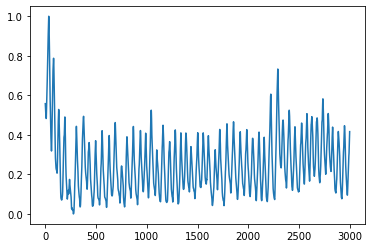

In [11]:
plt.plot(sitting_set)

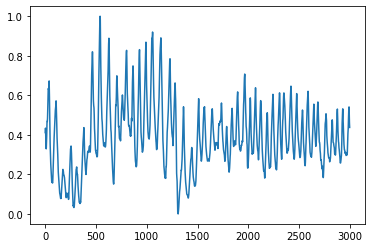

In [12]:
plt.plot(standing_set)

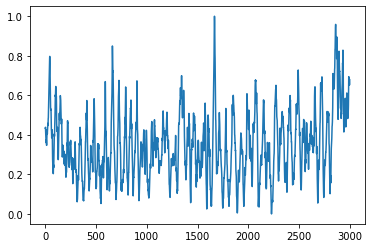

In [13]:
plt.plot(walking_set)

In [14]:
#Split into training set and test set
train_size = int(len(sitting_set) * 0.80)
test_size = len(sitting_set) - train_size

In [15]:
train_sitting, test_sitting = sitting_set[0:train_size,:], sitting_set[train_size:len(sitting_set),:]
train_standing, test_standing = standing_set[0:train_size,:], standing_set[train_size:len(standing_set),:]
train_walking, test_walking = walking_set[0:train_size,:], walking_set[train_size:len(walking_set),:]

In [16]:
# Comvert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        temp = dataset[i:(i+look_back), 0]
        dataX.append(temp)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
# Reshape for training into X=t and Y=t+1 as [sample, features]
train_sitting_X, train_sitting_Y = create_dataset(train_sitting)
train_standing_X, train_standing_Y = create_dataset(train_standing)
train_walking_X, train_walking_Y = create_dataset(train_walking)

In [18]:
# Reshape tesing [sample, features]
test_sitting_X, test_sitting_Y = create_dataset(test_sitting)
test_standing_X, test_standing_Y = create_dataset(test_standing)
test_walking_X, test_walking_Y = create_dataset(test_walking)

In [19]:
# Now reshape to be [samples, time steps, features] for the X_axis for training data
train_sitting_X = np.reshape(train_sitting_X, (train_sitting_X.shape[0], 1, train_sitting_X.shape[1]))
train_standing_X = np.reshape(train_standing_X, (train_standing_X.shape[0], 1, train_standing_X.shape[1]))
train_walking_X = np.reshape(train_walking_X, (train_walking_X.shape[0], 1, train_walking_X.shape[1]))

In [20]:
# # Now reshape to be [samples, time steps, features] for the X_axis for test data
test_sitting_X = np.reshape(test_sitting_X, (test_sitting_X.shape[0], 1, test_sitting_X.shape[1]))
test_standing_X = np.reshape(test_standing_X, (test_standing_X.shape[0], 1, test_standing_X.shape[1]))
test_walking_X = np.reshape(test_walking_X, (test_walking_X.shape[0], 1, test_walking_X.shape[1]))

In [21]:
# Create and the fit the LSTM network, with 1 visible layer with 1 input and a hitten
# layer with 4 LSTM neurons
model = Sequential()
model.add(LSTM(4, input_shape=(1,1)))

In [22]:
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(train_sitting_X, train_sitting_Y, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/100
2398/2398 - 4s - loss: 0.0087
Epoch 2/100
2398/2398 - 4s - loss: 2.3181e-04
Epoch 3/100
2398/2398 - 4s - loss: 2.3975e-04
Epoch 4/100
2398/2398 - 5s - loss: 2.3595e-04
Epoch 5/100
2398/2398 - 5s - loss: 2.3645e-04
Epoch 6/100
2398/2398 - 4s - loss: 2.3127e-04
Epoch 7/100
2398/2398 - 4s - loss: 2.3793e-04
Epoch 8/100
2398/2398 - 4s - loss: 2.3550e-04
Epoch 9/100
2398/2398 - 5s - loss: 2.3241e-04
Epoch 10/100
2398/2398 - 7s - loss: 2.4030e-04
Epoch 11/100
2398/2398 - 4s - loss: 2.3425e-04
Epoch 12/100
2398/2398 - 4s - loss: 2.3811e-04
Epoch 13/100
2398/2398 - 4s - loss: 2.4096e-04
Epoch 14/100
2398/2398 - 4s - loss: 2.3618e-04
Epoch 15/100
2398/2398 - 4s - loss: 2.3687e-04
Epoch 16/100
2398/2398 - 4s - loss: 2.3464e-04
Epoch 17/100
2398/2398 - 4s - loss: 2.3780e-04
Epoch 18/100
2398/2398 - 4s - loss: 2.3579e-04
Epoch 19/100
2398/2398 - 4s - loss: 2.3704e-04
Epoch 20/100
2398/2398 - 4s - loss: 2.3648e-04
Epoch 21/100
2398/2398 - 4s - loss: 2.3537e-04
Epoch 22/100
2398/2398 - 4

In [23]:
# Make prediction for sitting
training_prediction_sitting = model.predict(train_sitting_X)
test_prediction_sitting = model.predict(test_sitting_X)

In [24]:
# Invert Prediction
train_prediction_invert_sitting = scaler.inverse_transform(training_prediction_sitting)
train_sitting_Y = scaler.inverse_transform([train_sitting_Y])

In [25]:
test_prediction_invert_sitting = scaler.inverse_transform(test_prediction_sitting)
test_sitting_Y = scaler.inverse_transform([test_sitting_Y])

In [26]:
# Calculating the root error
training_score = math.sqrt(mean_squared_error(train_sitting_Y[0],train_prediction_invert_sitting[:,0]))
print('Training Score:', (training_score))

Training Score: 0.22723345175110618


In [27]:
testing_score = math.sqrt(mean_squared_error(test_sitting_Y[0],test_prediction_invert_sitting[:,0]))
print('Training Score:', (testing_score))

Training Score: 0.22521869182258122


In [28]:
# Trained Prediction
trainingPredictPlot_sitting = np.empty_like(sitting_set)
trainingPredictPlot_sitting[:, :] = np.nan
trainingPredictPlot_sitting[1:len(train_prediction_invert_sitting)+1, :] = train_prediction_invert_sitting

In [29]:
# Test Prediction
testPredictPlot_sitting = np.empty_like(sitting_set)
testPredictPlot_sitting[:, :] = np.nan
testPredictPlot_sitting[len(train_prediction_invert_sitting)+(1*2)+1:len(sitting_set)-1, :] = test_prediction_invert_sitting

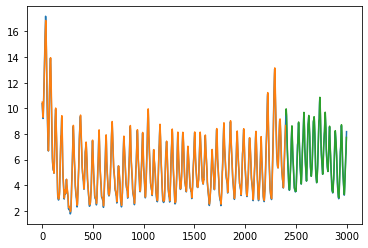

In [30]:
# Predictions
plt.plot(scaler.inverse_transform(sitting_set))
plt.plot(trainingPredictPlot_sitting)
plt.plot(testPredictPlot_sitting)
plt.savefig('sitting_set.png', dpi=500)
plt.show()

In [31]:
# Create and the fit the LSTM network, with 1 visible layer with 1 input and a hitten
# layer with 4 LSTM neurons
model = Sequential()
model.add(LSTM(4, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [32]:
model.fit(train_standing_X, train_standing_Y, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/100
2398/2398 - 5s - loss: 0.0199
Epoch 2/100
2398/2398 - 5s - loss: 2.7733e-04
Epoch 3/100
2398/2398 - 7s - loss: 2.7251e-04
Epoch 4/100
2398/2398 - 5s - loss: 2.8136e-04
Epoch 5/100
2398/2398 - 5s - loss: 2.7352e-04
Epoch 6/100
2398/2398 - 5s - loss: 2.7940e-04
Epoch 7/100
2398/2398 - 6s - loss: 2.7551e-04
Epoch 8/100
2398/2398 - 6s - loss: 2.7498e-04
Epoch 9/100
2398/2398 - 7s - loss: 2.7402e-04
Epoch 10/100
2398/2398 - 7s - loss: 2.7247e-04
Epoch 11/100
2398/2398 - 7s - loss: 2.7552e-04
Epoch 12/100
2398/2398 - 8s - loss: 2.7703e-04
Epoch 13/100
2398/2398 - 7s - loss: 2.7493e-04
Epoch 14/100
2398/2398 - 7s - loss: 2.7455e-04
Epoch 15/100
2398/2398 - 7s - loss: 2.7062e-04
Epoch 16/100
2398/2398 - 7s - loss: 2.6754e-04
Epoch 17/100
2398/2398 - 8s - loss: 2.7509e-04
Epoch 18/100
2398/2398 - 8s - loss: 2.7370e-04
Epoch 19/100
2398/2398 - 8s - loss: 2.6984e-04
Epoch 20/100
2398/2398 - 7s - loss: 2.7090e-04
Epoch 21/100
2398/2398 - 7s - loss: 2.7477e-04
Epoch 22/100
2398/2398 - 8

In [33]:
# Make prediction for standing
training_prediction_standing = model.predict(train_standing_X)
test_prediction_standing = model.predict(test_standing_X)

In [34]:
# Invert Prediction
train_prediction_invert_standing = scaler.inverse_transform(training_prediction_standing)
print(train_standing_Y.shape)
train_standing_Y = scaler.inverse_transform([train_standing_Y])
test_prediction_invert_standing = scaler.inverse_transform(test_prediction_standing)
test_standing_Y = scaler.inverse_transform([test_standing_Y])

(2398,)


In [35]:
# Calculating the root error
training_score = math.sqrt(mean_squared_error(train_standing_Y[0],train_prediction_invert_standing[:,0]))
print('Training Score:', (training_score))
testing_score = math.sqrt(mean_squared_error(test_standing_Y[0],test_prediction_invert_standing[:,0]))
print('Training Score:', (testing_score))

Training Score: 0.2881516815149013
Training Score: 0.2515256989869222


In [36]:
# Trained Prediction
trainingPredictPlot_standing = np.empty_like(standing_set)
trainingPredictPlot_standing[:, :] = np.nan
trainingPredictPlot_standing[1:len(train_prediction_invert_standing)+1, :] = train_prediction_invert_standing
# Test Prediction
testPredictPlot_standing = np.empty_like(standing_set)
testPredictPlot_standing[:, :] = np.nan
testPredictPlot_standing[len(train_prediction_invert_standing)+(1*2)+1:len(standing_set)-1, :] = test_prediction_invert_standing

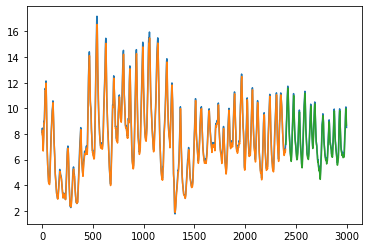

In [37]:
# Predictions
plt.plot(scaler.inverse_transform(standing_set))
plt.plot(trainingPredictPlot_standing)
plt.plot(testPredictPlot_standing)
plt.savefig('standing_set.png',dpi=500)
plt.show()

In [38]:
# Create and the fit the LSTM network, with 1 visible layer with 1 input and a hitten
# layer with 4 LSTM neurons
model = Sequential()
model.add(LSTM(4, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(train_walking_X, train_walking_Y, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/100
2398/2398 - 4s - loss: 0.0088
Epoch 2/100
2398/2398 - 4s - loss: 6.2084e-04
Epoch 3/100
2398/2398 - 4s - loss: 6.2561e-04
Epoch 4/100
2398/2398 - 4s - loss: 6.3107e-04
Epoch 5/100
2398/2398 - 4s - loss: 6.2482e-04
Epoch 6/100
2398/2398 - 4s - loss: 6.2992e-04
Epoch 7/100
2398/2398 - 4s - loss: 6.1622e-04
Epoch 8/100
2398/2398 - 4s - loss: 6.3202e-04
Epoch 9/100
2398/2398 - 4s - loss: 6.2272e-04
Epoch 10/100
2398/2398 - 4s - loss: 6.2570e-04
Epoch 11/100
2398/2398 - 4s - loss: 6.3135e-04
Epoch 12/100
2398/2398 - 4s - loss: 6.2284e-04
Epoch 13/100
2398/2398 - 4s - loss: 6.2592e-04
Epoch 14/100
2398/2398 - 4s - loss: 6.2735e-04
Epoch 15/100
2398/2398 - 4s - loss: 6.2923e-04
Epoch 16/100
2398/2398 - 4s - loss: 6.1628e-04
Epoch 17/100
2398/2398 - 4s - loss: 6.1558e-04
Epoch 18/100
2398/2398 - 4s - loss: 6.3377e-04
Epoch 19/100
2398/2398 - 4s - loss: 6.2722e-04
Epoch 20/100
2398/2398 - 4s - loss: 6.2655e-04
Epoch 21/100
2398/2398 - 5s - loss: 6.3320e-04
Epoch 22/100
2398/2398 - 5

In [39]:
# Make prediction for walking
training_prediction_walking = model.predict(train_walking_X)
test_prediction_walking = model.predict(test_walking_X)
# Invert Prediction
train_prediction_invert_walking = scaler.inverse_transform(training_prediction_walking)
train_walking_Y = scaler.inverse_transform([train_walking_Y])
test_prediction_invert_walking = scaler.inverse_transform(test_prediction_walking)
test_walking_Y = scaler.inverse_transform([test_walking_Y])

In [40]:
# Calculating the root error
training_score = math.sqrt(mean_squared_error(train_walking_Y[0],train_prediction_invert_walking[:,0]))
print('Training Score:', (training_score))
testing_score = math.sqrt(mean_squared_error(test_walking_Y[0],test_prediction_invert_walking[:,0]))
print('Training Score:', (testing_score))
# Trained Prediction
trainingPredictPlot_walking = np.empty_like(walking_set)
trainingPredictPlot_walking[:, :] = np.nan
trainingPredictPlot_walking[1:len(train_prediction_invert_walking)+1, :] = train_prediction_invert_walking
# Test Prediction
testPredictPlot_walking = np.empty_like(walking_set)
testPredictPlot_walking[:, :] = np.nan
testPredictPlot_walking[len(train_prediction_invert_walking)+(1*2)+1:len(walking_set)-1, :] = test_prediction_invert_walking

Training Score: 0.39528154368554747
Training Score: 0.4366331719266566


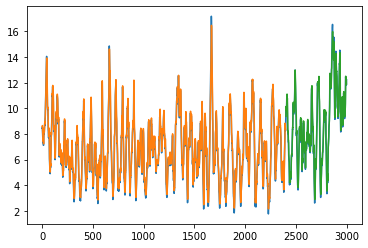

In [41]:
# Predictions
plt.plot(scaler.inverse_transform(walking_set))
plt.plot(trainingPredictPlot_walking)
plt.plot(testPredictPlot_walking)
plt.savefig('walking_set.png',dpi=500)
plt.show()